#### ***Στοιχεία μελών ομάδας***
---
* Ονοματεπώνυμο 1ου μέλους: Χριστόδουλος Στυλιανίδης
* Αριθμός Μητρώου: 03120614
* e-mail(s): el20614@mail.ntua.gr -- chrisstyles318@gmal.com
---  
* Ονοματεπώνυμο: Ιωάννης Τσαντήλας
* Αριθμός Μητρώου: 03120883
* e-mail(s): el20883@mail.ntua.gr -- juantsa@yahoo.com
---

# Κατασκευή Περιβάλλοντος Εργασίας
---

## Διάβασμα Αρχείων στο Colab (Μόνο για το Colab)
Αν η υλοποίηση γίνει στο google colab τότε μπορεί να χρησιμοποιηθεί το google drive ως file system. Για να γίνει Mount το google drive τρέχουμε τον παρακάτω κώδικα και κλικάρουμε στο link που θα μας εμφανιστεί.

```
from google.colab import drive
drive.mount('/content/drive')
import os
os.listdir('/gdrive/My Drive')
```
Έπειτα στην σελίδα που άνοιξε επιλέγουμε το mail μας και στο επόμενο παράθυρο που θα μας ανοίξει πατάμε Να επιτρέπεται. Στην συνέχεια αντιγράφουμε τον κωδικό που θα μας βγάλει και τον κάνουμε paste στο Input που έχει ανοίξει στο colab. Έτσι πλέον αν έχουμε ανεβάσει ένα αρχείο στο google drive μπορούμε να το βρούμε στην θέση:

```
movies_filename = '/gdrive/My Drive/' + movies_metadata.csv
```
Μπορούμε πλέον κανονικά να δουλέψουμε φτιάχνοντας φακέλους ή αρχεία και γενικότερα κάνοντας οτιδήποτε θα κάναμε αν ήμασταν τοπικά.

---

## Prolog μέσω Python

Το πακέτο που θα χρησιμοποιηθεί για την επικοινωνία Python και Prolog είναι το pyswip (https://pypi.org/project/pyswip/). Για να δουλέψει το Pyswip  χρειάζεται να υπάρχει το Swi-Prolog το όποιο αν δουλεύουμε τοπικά πρέπει να το εγκαταστήσουμε, ακολουθώντας αντίστοιχες οδηγίες στην σελίδα του εργαλείου. Για να γίνει του Swi-Prolog η εγκατάσταση στο Google Colab πρέπει να τρέξουμε τον παρακάτω κώδικα:

```
!sudo apt-get install software-properties-common
!sudo apt-add-repository ppa:swi-prolog/stable
!sudo apt-get update
!sudo apt-get install swi-prolog
```
Σε κάποιο σημείο της εκτέλεσης εμφανίζεται ένα μήνυμα ότι πρέπει να πατήσουμε enter σε ένα input για να συνεχίσει η διαδικασία. Έπειτα από αυτό η εκτέλεση θα συνεχίσει χωρίς κάποιο πρόβλημα.

Τέλος πρέπει να εγκαταστήσουμε το pyswip (**όπου και να δουλεύουμε**) όπως παρακάτω:

```
!pip isntall pyswip
```
---

# Τεχνητή Νοημοσύνη: Ενότητα 2
---

Ο στόχος της εργασίας είναι η κατασκευή ενός συστήματος προτάσεων (Recommendation System) για ταινίες. Οι προτάσεις αυτές θα πηγάζουν τόσο από τα χαρακτηριστικά της ταινίας όσο και από ορισμένες αξιολογήσεις του κάθε χρήστη.

Στα δεδομένα της άσκησης περιλαμβάνονται ένα αρχείο με το όνομα movies_metadata.csv το όποιο περιέχει τα χαρακτηριστικά κάθε ταινίας όπως θέμα, σκηνοθέτης ηθοποιοί, λέξεις κλειδιά κ.α. από το imdb καθώς και τα αρχεία ratings.csv τα όποια περιέχουν πραγματικές αξιολογήσεις χρηστών, χωρισμένες σε train και σε test.

---


# Εκφώνηση

Στην παρούσα εργασία σας ζητείται να μελετήσετε και να υλοποιήσετε τα παρακάτω.

Στο μέρος 1 και 2 θα εργαστείτε μόνο με το αρχείο movies_metadata.csv, ενώ στο μέρος τρία θα δουλέψετε και με τα αρχεία των αξιολογήσεων.

---

## **Μέρος 1: Μελέτη των Metadata, Δημιουργία κόσμου και των βασικών queries.**

### Ερώτημα 1α

---

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%%capture
#install swi-prolog
!sudo apt-get install software-properties-common
!sudo apt-add-repository ppa:swi-prolog
!sudo apt-get update
!sudo apt-get install swi-prolog
#install pyswip
!pip install pyswip

In [ ]:
import pandas as pd
from pyswip import Prolog

In [ ]:
def clean_text(text):
  text = text.replace(u'\xa0', u'')
  text = text.replace(u"'", u'')
  return text

In [ ]:
import pandas as pd

path = '/content/drive/MyDrive/Ece-Ntua/Lab_AI/Exercise_2/'

# Read 'movie_metadata.csv' file.
def preprocess_data(chunk):
    chunk.fillna("UNK", inplace=True)
    chunk['movie_title'] = chunk['movie_title'].apply(clean_text)
    return chunk

# Read and process data in chunks
chunk_size = 10000  # Adjust based on your environment
chunks = pd.read_csv(path + "movies_metadata.csv", chunksize=chunk_size)
processed_chunks = [preprocess_data(chunk) for chunk in chunks]
data = pd.concat(processed_chunks)

# Preview the first 5 lines of the loaded data
data.head()

,Unnamed: 0,budget,genres,homepage,id,plot_keywords,language,original_title,overview,popularity,...,tagline,movie_title,vote_average,num_voted_users,title_year,country,director_name,actor_1_name,actor_2_name,actor_3_name
0,0,237000000,Action|Adventure|Fantasy|Science Fiction,http://www.avatarmovie.com/,19995,culture clash|future|space war|space colony|so...,English,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,Enter the World of Pandora.,Avatar,7.2,11800,2009.0,United States of America,James Cameron,Zoe Saldana,Sigourney Weaver,Stephen Lang
1,1,300000000,Adventure|Fantasy|Action,http://disney.go.com/disneypictures/pirates/,285,ocean|drug abuse|exotic island|east india trad...,English,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At Worlds End,6.9,4500,2007.0,United States of America,Gore Verbinski,Orlando Bloom,Keira Knightley,Stellan Skarsgård
2,2,245000000,Action|Adventure|Crime,http://www.sonypictures.com/movies/spectre/,206647,spy|based on novel|secret agent|sequel|mi6|bri...,Français,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,A Plan No One Escapes,Spectre,6.3,4466,2015.0,United Kingdom,Sam Mendes,Christoph Waltz,Léa Seydoux,Ralph Fiennes
3,3,250000000,Action|Crime|Drama|Thriller,http://www.thedarkknightrises.com/,49026,dc comics|crime fighter|terrorist|secret ident...,English,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,The Legend Ends,The Dark Knight Rises,7.6,9106,2012.0,United States of America,Christopher Nolan,Michael Caine,Gary Oldman,Anne Hathaway
4,4,260000000,Action|Adventure|Science Fiction,http://movies.disney.com/john-carter,49529,based on novel|mars|medallion|space travel|pri...,English,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,"Lost in our world, found in another.",John Carter,6.1,2124,2012.0,United States of America,Andrew Stanton,Lynn Collins,Samantha Morton,Willem Dafoe


In [ ]:
# Create World
prolog = Prolog()
import ast

# For each row of the table we create the categories we want to store
# First in a list called literals
literals = []
movie_score = {}

# Creation of literals
for row in data.itertuples(index=True, name='Pandas'):

  movie_title = clean_text(getattr(row, 'movie_title'))

  # Genres
  for genre in getattr(row, 'genres').split("|"):
    literals.append("genre('"+ movie_title +"','"+ genre +"')")

  # Keywords
  for keyword in getattr(row, 'plot_keywords').split("|"):
    literals.append("keywords('"+ movie_title +"','"+ clean_text(keyword) +"')")

  # Director
  literals.append("director('"+ movie_title +"','"+ clean_text(getattr(row,'director_name'))+"')")

  # Actors
  literals.append("actor('"+ movie_title +"','"+ clean_text(getattr(row,'actor_1_name'))+"')")
  literals.append("actor('"+ movie_title +"','"+ clean_text(getattr(row,'actor_2_name'))+"')")
  literals.append("actor('"+ movie_title +"','"+ clean_text(getattr(row,'actor_3_name'))+"')")

  # Language
  literals.append("language('"+ movie_title +"','"+ clean_text(getattr(row,'language'))+"')")

  # Production Companies aka Studios
  production_companies = ast.literal_eval(row.production_companies)
  for company in production_companies:
    literals.append("companies('"+ movie_title +"','"+ clean_text(company['name']) +"')")

  # Production Countries
  production_countries = ast.literal_eval(row.production_countries)
  for country in production_countries:
    literals.append("countries('"+ movie_title +"','"+ clean_text(country['name']) +"')")

  # Decade
  if (row.title_year!="UNK"):  # Check if the year is not NaN
        year = int(row.title_year)
        decade = str(year - year % 10)
        literals.append(f"decade('{movie_title}','{decade}')")

# Prolog wants the literals in order
literals.sort()
for literal in literals:
  prolog.assertz(literal)
  print (literal +'.')


Streaming output truncated to the last 5000 lines.
keywords('Yours, Mine and Ours','sibling').
keywords('Yours, Mine and Ours','widow').
keywords('Youth in Revolt','based on novel').
keywords('Youth in Revolt','coming of age').
keywords('Youth in Revolt','duringcreditsstinger').
keywords('Youve Got Mail','online dating').
keywords('Youve Got Mail','romantic comedy').
keywords('Youve Got Mail','woman director').
keywords('Z Storm','UNK').
keywords('ZMD: Zombies of Mass Destruction','racist').
keywords('ZMD: Zombies of Mass Destruction','religion').
keywords('Zack and Miri Make a Porno','aftercreditsstinger').
keywords('Zack and Miri Make a Porno','best friend').
keywords('Zack and Miri Make a Porno','best friends in love').
keywords('Zack and Miri Make a Porno','duringcreditsstinger').
keywords('Zack and Miri Make a Porno','love of ones life').
keywords('Zack and Miri Make a Porno','platonic love').
keywords('Zack and Miri Make a Porno','pornographic video').
keywords('Zack and Miri Mak

'\n# Adding literals in a file\nwith open(path+"literals.txt", \'w\') as f:\n    for literal in literals:\n        prolog.assertz(literal)\n        f.write(literal + \'.\n\')\n'

### Ερώτημα 1β
---

Αφού δημιουργήσετε τον κόσμο του προβλήματος, στη συνέχεια καλείστε να δημιουργήσετε, σε Prolog, απλούς κανόνες οι οποίοι θα βρίσκουν όλες τις ταινίες με:
1.	Κοινό θέμα (κάποιες λέξεις σχετικά με το genre κοινές)
2.	Αρκετά κοινό θέμα (κάποιες λιγότερες λέξεις σχετικά με το genre κοινές π.χ. 3)
3.	Σχετικά κοινό θέμα (λίγες λέξεις σχετικές με το genre κοινές π.χ. 1)
4.	Κοινός σκηνοθέτης
5.	Ακριβώς ίδια πλοκή (κάποιες λέξεις κλειδιά της πλοκής κοινές)
6.	Σχετικά ίδια πλοκή (κάποιες λιγότερες λέξεις κλειδιά κοινές)
7.	Ίδιους τους βασικούς ηθοποιούς (και τους 3)
8.	Αρκετά ίδιους βασικούς ηθοποιούς (ορισμένους βασικούς ηθοποιούς κοινούς π.χ. 2)
9.	Σχετικά ίδιους ηθοποιούς (π.χ. 1 από τους 3)
10.	Ίδια γλώσσα
11.	Είναι έγχρωμες ή ασπρόμαυρες
12. Κοινό studio παραγωγής
13. Κοινή χώρα παραγωγής
14. Ίδια δεκαετία

Αξίζει να σημειωθεί ότι στα παραπάνω μπορείτε να προσθέσετε περισσότερα ερωτήματα ή να αλλάξετε την κλιμακωσιμότητα των queries (πέρα από το ίδιο, αρκετά ίδιο, σχετικά ίδιο) που θα κατασκευάσετε(π.χ. μια κλίμακα από 1 στα 5 όπου αυτό είναι δυνατόν), μιας και αυτά στην συνέχεια θα χρησιμοποιηθούν για την λειτουργία του recommender. Έτσι μπορείτε να προσθέσετε queries με τα όποια μπορεί να παράγονται καλύτερες συστάσεις  (το αρχείο movie_metadata.csv περιέχει πολλές πληροφορίες ακόμα για κάθε ταινία όπως έτος κυκλοφορίας, βαθμολογία στο imdb, facebοok_likes κ.α.). Το συγκεκριμένο μέρος εργασίας είναι προπαρασκευαστικό οπότε όσο καλύτερα και πλουσιότερα τα ερωτήματα που θα φτιάξετε σε αυτό το μέρος τόσο καλύτερη θα είναι η απόδοσή των συστημάτων συστάσεων των επόμενων ερωτημάτων.

Περισσότερες πληροφορίες για το dataset μπορείτε να διαβάσετε σε αυτό το [Link](https://www.kaggle.com/georgefila/movies-metadata).

---

In [ ]:
# We consult into our world the following file, containing the queries of Question 1b
# For simplicity, we also include the answer to Question 2
prolog.consult(path + "rules.pl")
prolog.consult(path + "recommend.pl")

In [ ]:
query = "find_sim_2('Tangled', Movie2)"
result = prolog.query(query)

for res in result:
  print (res);

{'Movie2': 'Big Hero 6'}
{'Movie2': 'Bolt'}
{'Movie2': 'Frozen'}
{'Movie2': 'Mars Needs Moms'}
{'Movie2': 'Winnie the Pooh'}
{'Movie2': 'Wreck-It Ralph'}
{'Movie2': '102 Dalmatians'}
{'Movie2': 'A Bugs Life'}
{'Movie2': 'Air Bud'}
{'Movie2': 'Aladdin'}
{'Movie2': 'Alexander and the Terrible, Horrible, No Good, Very Bad Day'}
{'Movie2': 'Alice Through the Looking Glass'}
{'Movie2': 'Alice in Wonderland'}
{'Movie2': 'Atlantis: The Lost Empire'}
{'Movie2': 'Bedtime Stories'}
{'Movie2': 'Beverly Hills Chihuahua'}
{'Movie2': 'Big Hero 6'}
{'Movie2': 'Brave'}
{'Movie2': 'Cars 2'}
{'Movie2': 'Cars'}
{'Movie2': 'Chicken Little'}
{'Movie2': 'Cinderella'}
{'Movie2': 'Confessions of a Teenage Drama Queen'}
{'Movie2': 'Dinosaur'}
{'Movie2': 'Dougs 1st Movie'}
{'Movie2': 'Eight Below'}
{'Movie2': 'Enchanted'}
{'Movie2': 'Fantasia 2000'}
{'Movie2': 'Fantasia'}
{'Movie2': 'Flubber'}
{'Movie2': 'Frozen'}
{'Movie2': 'G-Force'}
{'Movie2': 'George of the Jungle'}
{'Movie2': 'Glory Road'}
{'Movie2': 'Hann

Για λόγους ευανάγνωσης της εργασίας, παραθέτουμε παρακάτω τα queries, όπως αυτά βρίσκονται στο αρχείο "queries.pl".

---
Χρησιμοποιήσαμε μερικά βοηθητικά queries:

```
commonGenres(X,Y,[]):-
    X \= Y,
    findall(G, genre(X, G), GenresX),
    findall(G, genre(Y, G), GenresY),
    same_elements(GenresX,GenresY).
```
```
commonGenres(X, Y, [H|T]) :-
    genre(X, H),
    genre(Y, H),
    commonGenres(X, Y, T).
```
```
same_genre(X, Y, G):- genre(X, G), genre(Y, G), X \= Y.
same_keyword(X, Y, K):- keywords(X, K), keywords(Y, K), X \= Y.
same_actor(X, Y, A):- actor(X, A), actor(Y, A), X \= Y.
```
```
same_elements([], []).
same_elements([Head|Tail], List) :-
    select(Head, List, Rest),
    same_elements(Tail, Rest).
```
```
find_genres(Movie, Genres):- findall(G, genre(Movie, G), Genres).
```
```
list_length([], 0).
list_length([_|Tail], Length) :-
    list_length(Tail, TailLength),
    Length is TailLength + 1.
```
---
Ενώ τα queries του Ερωτήματος 1β είναι:

```
% 1 - All Genres Common
all_genres_common(Movie1, Movie2):-
    find_genres(Movie1, X),
    find_genres(Movie2, Y),
    list_length(X, XL),
    list_length(Y, YL),
    (XL =< YL -> commonGenres(Movie1, Movie2, X) ; XL > YL -> commonGenres(Movie1, Movie2, Y)).
```
---
```
% 2 - 3 Common Genres
three_common_genres(X, Y):-
    same_genre(X, Y, X1),
    same_genre(X, Y, X2),
    same_genre(X, Y, X3),
    X1 @< X2,
    X1 @< X3,
    X2 @< X3.
```
---
```
% 3 - 1 Common Genre
one_common_genre(X, Y):- setof(G, same_genre(X, Y, G), _Genres).
```
---
```
% 4 - Common Director
common_director(Movie1, Movie2):-
    director(Movie1, D),
    director(Movie2, D),
    Movie1 \= Movie2.
```
---
```
% 5 - Common Keywords (more than 6)
common_keywords(Movie1, Movie2):-
    setof(K, same_keyword(Movie1, Movie2, K), Keywords),
    list_length(Keywords, Size),
    Size >= 6.
```
---
```
% 6 - Fewer Keywords (less than 6)
fewer_common_keywords(Movie1, Movie2):-
    setof(K, same_keyword(Movie1, Movie2, K), Keywords),
    list_length(Keywords, Size),
    Size < 6.
```
---
```
% 7 - All 3 Actors are Same
three_common_actors(Movie1, Movie2):-
    setof(A, actor(Movie1, A), [A1, A2, A3]),
    actor(Movie2, A1),
    actor(Movie2, A2),
    actor(Movie2, A3),
    Movie1 \= Movie2.
```
---
```
% 8 - 2 Common Actors
two_common_actors(Movie1, Movie2):-
    setof(A, same_actor(Movie1, Movie2, A), Actors),
    list_length(Actors, Size),
    Size =:= 2.
```
---
```
% 9 - 1 Common Actor
one_common_actors(Movie1, Movie2):-
    setof(A, same_actor(Movie1, Movie2, A), Actors),
    list_length(Actors, Size),
    Size =:= 1.
```
---
```
% 10 - Same Language
common_language(Movie1, Movie2):-
    language(Movie1, L),
    language(Movie2, L),
    Movie1 \= Movie2.
```
---
```
% 11 - Black and White or Color
is_black_and_white(Movie):- keywords(Movie, 'black and white').
```
---
```
%12 - Common Studio (production companies)
common_studio(Movie1, Movie2):-
    companies(Movie1, S),
    companies(Movie2, S),
    Movie1 \= Movie2.
```
---
```
% 13 - Common Production Country
common_production_country(Movie1, Movie2):-
    countries(Movie1, C),
    countries(Movie2, C),
    Movie1 \= Movie2.
```
---
```
%14 - Common Decade
common_decade(Movie1, Movie2):-
    decade(Movie1, D),
    decade(Movie2, D),
    Movie1 \= Movie2.
```
---

## **Μέρος 2: Recommendation System με βάση μόνο τα χαρακτηριστικά των ταινιών.**


Στο σημείο αυτό καλείστε με βάση αυτά που κάνατε στο μέρος 1 να κατασκευάσετε queries τα όποια θα σας επιστρέφουν παρόμοιες (σε χαρακτηριστικά) ταινίες. Τα ερωτήματα αυτά θα είναι κλιμακούμενα, δηλαδή θα υπάρχουν ερωτήματα που επιστρέφουν αρκετά κοινές ταινίες αλλά και που επιστρέφουν λιγότερο και λιγότερο κοινές (σε μια κλίμακα π.χ. από 1 σε 5). Για παράδειγμα:

```
find_simmilar_movies_5("Pirates Of The Caribbean", M).
M = "Pirates Of The Caribbean: On Stranger Tides"
M = "The Chronicles Of Narnia"
M = "Prince Of Persia: The Sands Of Time"
...
```
Για παράδειγμα, το παραπάνω ερώτημα θα επιστρέφει αρκετά κοινές σε περιεχόμενο ταινίες με την ταινια "Pirates Of The Caribbean". Θα υπάρχουν και αντίστοιχα ερωτήματα που θα βρίσκουν λιγότερο όμοιες ταινίες. Ο δείκτης ομοιότητας των ταινιών είναι αυθαίρετος και μπορείτε να τον ορίσετε εσείς όπως θέλετε, αρκεί να υπάρχει κάποια λογική σύνδεση με τα δεδομένα που περιέχονται στο αρχείο movies_metadata.csv.

Συνεπώς η συνάρτηση που θα κάνει τις προτάσεις (recommendation) με είσοδο μια ταινία πρέπει να επιστρέφει-εκτυπώνει μια λίστα με τις προτεινόμενες ταινίες κατά φθίνουσα σειρά ομοιότητας.

---

Στο σημείο αυτό με βάση τους κανόνες που κατασκευάστηκαν στο Μέρος 1 θα κατασκευαστούν κατηγορήματα για την ομοιότητα ταινιών. Παρακάτω δίνεται ένα μικρό παράδειγμα ενός κανόνα και πώς αυτός θα μπορούσε να γραφτεί μέσω του Pyswip. Επίσης όπως αναφέρεται και σε σχόλιο παραπάνω θα μπορεί να γραφτεί και μια βάση δεδομένων με τους κανόνες και να γίνει απευθείας consult.

Στο παρακάτω παράδειγμα το 5 και το 4 εκφράζουν την ομοιότητα των ταινιών π.χ. οι ταινίες που παράγονται μέσω του find_similar_5 είναι πιο όμοιες από αυτές που παράγονται μέσω του find_similar_4.

In [ ]:
def simple_recommender(movie):
    s = []
    l = set()
    queries = [
      f"find_sim_5('{movie}', M)",
      f"find_sim_4('{movie}', M)",
      f"find_sim_3('{movie}', M)",
      f"find_sim_2('{movie}', M)",
      f"find_sim_1('{movie}', M)"
    ]

    # Process each query.
    for i, queryName in enumerate(queries):
      result = prolog.query(queryName)
      for r in result:
        if r['M'] not in s:
          s.append(r['M'])
          l.add((r['M'], (5 - i)))

    answers = l
    return answers

In [ ]:
print(simple_recommender('Stand by Me'))

{('JFK', 1), ('The Interpreter', 1), ('30 Minutes or Less', 2), ('Garden State', 1), ('Loving Annabelle', 1), ('Serial Mom', 1), ('Celeste & Jesse Forever', 1), ('The Craft', 2), ('Chocolat', 1), ('The Dirties', 1), ('Grace Unplugged', 1), ('Robot & Frank', 1), ('Outbreak', 1), ('Capote', 1), ('The Sisterhood of Night', 1), ('A Walk on the Moon', 1), ('The Wrestler', 1), ('Nowhere Boy', 1), ('Sin City: A Dame to Kill For', 1), ('Rebecca', 1), ('The Haunting of Molly Hartley', 1), ('200 Cigarettes', 1), ('The Good German', 1), ('Ghost Rider: Spirit of Vengeance', 2), ('The Fall of the Roman Empire', 1), ('Next Day Air', 1), ('Atlas Shrugged Part III: Who is John Galt?', 1), ('Straight Outta Compton', 1), ('Hannah Montana: The Movie', 1), ('Little Man', 1), ('Alexanders Ragtime Band', 1), ('The Boondock Saints II: All Saints Day', 1), ('Terminator Salvation', 2), ('The Pink Panther', 2), ('Burlesque', 1), ('Atonement', 1), ('Juwanna Mann', 1), ('Spider-Man 2', 2), ('Return to the Blue La

## **Μέρος 3: Recommendation System Με βάση τις προτιμήσεις - Αξιολογήσεις του χρήστη - Εκπαίδευση και Πρόβλεψη**

Σε αυτό το σημείο θα εργαστείτε με τα αρχεία ratings τα όποια περιέχουν αξιολογήσεις (από 1 μέχρι 5) για τις παραπάνω ταινίες. Το προηγούμενο σύστημα συστάσεων προτείνει στον χρήστη ταινίες αποκλειστικά με βάση την ομοιότητά τους. Σε αυτό το σημείο θα γίνει μια αναβάθμιση του συστήματος έτσι ώστε να παράγονται καλύτερες  συστάσεις οι όποιες θα λαμβάνουν υπόψιν και τις προτιμήσεις του χρήστη, οι όποιες θα εξάγονται από τις αξιολογήσεις που έχει κάνει μέχρι στιγμής.

Η εκπαίδευση του recommender θα γίνεται ως εξής:

Για κάθε ταινία θα υπάρχει ένα score το όποιο αρχικά θε είναι ίσο με 0 και θα διαμορφώνεται από τις αξιολογήσεις κάθε user. Έτσι για έναν χρήστη με βάση τις αξιολογήσεις που υπάρχουν στο αρχείο train_ratings θα πρέπει:

1.	Για κάθε ταινία που έχει βαθμολογήσει να βρίσκονται οι κοινές ταινίες ανά κλίμακα και στο μέχρι τώρα σκορ κάθε παρόμοιας ταινίας θα προστίθεται ένα βάρος το όποιο θα μπορούσε να είναι το ποσοστό ομοιότητας της ταινίας (δηλαδή ένα βάρος για κάθε κλίμακα, αν δύο ταινίες μοιάζουν ενισχύουμε το βάρος που προσθέτουμε από το να μοιάζουν λιγότερο) επί τον βαθμό που έχει βάλει ο χρήστης για την αρχική ταινία (διαφορετικό είναι ο χρήστης να έχει βάλει 5/5 ή 1/5 σε μια ταινία από 3/5).

2. Στη συνέχεια, ανάλογα με το σκορ που έχει σχηματιστεί για κάθε ταινία, θα επιλέγεται αν αυτή θα μπορούσε να είναι προτεινόμενη για τον χρήστη ή όχι και θα μετράμε το πόσο καλά τα πήγε το σύστήμά μας με βάση ορισμένες μετρικές.

Η λογική πίσω από την παραπάνω διαδικασία είναι ότι παρόμοιες ταινίες θα έχουν ανάλογο βαθμό. Για παράδειγμα αν ένας χρήστης έχει αξιολογήσει αρκετές  ταινίες οι όποιες είναι sci-fiction με 5/5 τότε μια ταίνια sci-fiction την όποια δεν έχει δεί λογικά θα του αρέσει και θα έπρεπε να την προτείνουμε.

Μετά την εκπαίδευση του συστήματος σας καλείστε να δοκιμάσετε τον recommender που κατασκευάσατε στην πράξη. Για τον σκοπό αυτό θα φορτώσετε το αρχείο test_ratings.csv όπου περιέχονται οι αξιολογήσεις του ίδιου χρήστη για άλλες ταινίες. Το σύστημά σας πρέπει να προβλέπει αν μια ταινία θα πρέπει να προταθεί στον χρήστη. Μια ταίνια θεωρούμε οτι προτείνεται στον  χρήστη, αν έχει βαθμό μεγαλύτερο του 3 στο test_ratings. Συνεπώς για την επίβλεψη του συστήματός σας θα πρέπει για κάθε μια από τις ταινίες του αρχείου test_ratings.csv να προβλέψετε εάν θα αρέσει στο χρήστη ή όχι ώστε να την προτείνετε.

ΠΡΟΣΟΧΗ! Η "βαθμολογία" που θα υπολογίσετε για κάθε ταινία κατά το training δεν είναι απαραίτητα πρόβλεψη της βαθμολογίας που θα έβαζε ο χρήστης.

Στην συνέχεια, σε συνδιασμό με τις πραγματικές απαντήσεις του χρήστη θα αξιολογήσετε το σύστημά σας χρησιμοποιόντας τις μετρικές: precision, recall, f1 οι οποίες είναι οι πλέον γνωστές μετρικές και ευρέως χρησιμοποιούμενες τεχνικές για την επίβλεψη-μέτρηση απόδοσης ανάλογων συστημάτων.

1. Precision: Δείχνει πόσο ακριβές είναι το σύστημα. Υπολογίζει πόσα από τα στιγμιότυπα τα όποια προβλέψαμε ότι ανήκουν σε μια κλάση όντως ανήκουν σε αυτή. Η μετρική αυτή μας δίνει μια εικόνα σχετικά με τον αριθμό των ταινίων που προβλέψαμε ως προτεινόμενες ενώ δεν θα έπρεπε.

2. Recall: Υπολογίζει πόσα από τα στιγμιότυπα που ανήκουν σε μια κλάση (π.χ. προτεινόμενες ταινίες) προβλέφθηκαν σωστά.

3. F1: Είναι ένας μέσος μεταξύ των παραπάνω δυο μετρικών, έτσι ώστε να διατηρείται μια ισορροπία μεταξύ τους. Υπολογίζεται από την παρακάτω σχέση:

$$F_1=2\frac{Precision\times{Recall}}{Precision+Recall}$$

Οι παραπάνω συναρτήσεις παρέχονται από την βιβλιοθήκη scikit-learn.

Τέλος για την καλύτερη επίβλεψη του συστήματος σας μπορείτε να εκπαιδεύσετε  τον recommender σας με ένα υποσύνολο ταινίων από ελάχιστες, λίγες μέχρι και πολλές (π.χ. 3, 5, 10, 50, ...) για να μελετήσετε κατά πόσο σας βοηθούν οι επιπλέον αξιολογήσεις κάθε φορά (δηλαδή κατά πόσο βελτιώνονται οι παραπάνω μετρικές στο test set).

Έτσι π.χ. μπορείτε να εντοπίσετε περιπτώσεις όπως για παράδειγμα ότι με έναν recommender μπορεί να μην επιτυγχάνετε πολύ υψηλό σκορ όσο με άλλους, αλλά το βέλτιστο σκόρ σας επιτυγχάνεται πολύ γρηγόρα π.χ. με μόνο 10 ταινίες αντί 100. Έτσι για παράδειγμα αν ο αλγόριθμος τα πηγαίνει πολύ καλά για τρεις ταινίες και στη συνέχεια το σκορ βελτιώνεται ελάχιστα τότε αυτός ενδείκνυται για ένα σύστημα συστάσεων για νέους χρήστες όπου δεδομένου λίγων ταινιών ο αλγόριθμος είναι σε θέση να το να προτείνει καλές συστάσεις. Ενώ αν η καλύτερη απόδοση του αλγορίθμου σας είναι βέλτιστη με περισσότερες ταινίες π.χ. 50 τότε αυτός ο αλγόριθμος συστάσεων ενδείκνυται για παλιούς χρήστες με πολλές αξιολόγησεις.

In [ ]:
train_ratings = pd.read_csv(path + "Rating_Files/train_ratings.csv")
test_ratings = pd.read_csv(path + "Rating_Files/test_ratings.csv")

Αρχικά μελετάμε τις αξιολογήσεις κάθε χρήστη για να καταλάβουμε την δομή και τις πληροφορίες κάθε αρχείου.

In [ ]:
from tqdm.notebook import tqdm
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import random

rating_weights = {0: -1, 1: -0.5, 2:0, 3:0, 4:0.5, 5:1}
score_weights = {i:i + 1 for i in range(5)} # ανάλογα με τα επίπεδα ομοιότητας που έχουν οριστεί στην simple_recommender

def train_recommender(ratings, rating_weights, score_weights, number_of_movies = 10):
    """
    Στην συνάρτηση αυτή μπορούμε να ορίζουμε ποιο υποσύνολο των αξιολογήσεων θα χρησιμοποιήσουμε για το train μαζί με τα βάρη ομοιότητας και σκορ
    Σε συνδυασμό με τον αριθμό των ταινιών που θέλουμε να χρησιμοποιήσουμε σαν σύνολο δεδομένων π.χ. 10 από τις 100 ή 3 από τις 100 κ.ο.κ
    Αν θέλουμε να χρησιμοποιήσουμε όλες τις ταινίες σαν training set τότε ορίζουμε το number_of_movies = - 1
    """

    if number_of_movies > len(ratings):
        number_of_movies = len(ratings)


    if number_of_movies != -1:
        indexes = random.sample(range(len(ratings)), number_of_movies)
        ratings = ratings.iloc[indexes]

    movie_score = {}
    for row in tqdm(ratings.itertuples(index=True, name='Pandas')):
        movie = clean_text(getattr(row, 'movie_title'))
        rating = getattr(row, 'rating')

        similar_movies = simple_recommender(movie)

        for similar_movie in similar_movies:
            if similar_movie not in movie_score:
                movie_score[similar_movie[0]] = rating_weights[int(rating)] * score_weights[similar_movie[1] - 1]
            else:
                movie_score[similar_movie[0]] += rating_weights[int(rating)] * score_weights[similar_movie[1] - 1] # το weight θα το ορίσετε ανα επίπεδο ομοιότητας οι πολύ όμοιες ταινίες θα έχουν μεγαλύτερο βάρος
    return movie_score


# Αυτό είναι ένα παράδειγμα για το πως θα μπορούσε να υλοποιήθει η predict.
# Έχουμε ορίσει ότι μια ταινία θα έπρεπε να είναι προτεινόμενη αν είχε σκορ > 0.
def predict_example(ratings, movie_score):
    real, pred = [], []
    for i, row in enumerate(ratings.itertuples(index=True, name='Pandas')):
        movie = clean_text(getattr(row, 'movie_title'))
        rating = getattr(row, 'rating')

        if movie in movie_score: #αν έχουμε σχηματίσει βαθμολογία για την ταινία αυτή
            pred.append(int(movie_score[movie] > 0)) #heuristic για το αν μια ταινία είναι προτεινόμενη
            real.append(int(rating > 3))# έτσι ορίζουμε ότι μια ταινία θα έπρεπε να είναι προτεινόμενη
            #η συνθήκη αυτή δεν μπορεί να αλλάξει
        else: #δεν μπορούμε να προτείνουμε κάτι για το όποιο δεν έχουμε σχηματίσει εικόνα
            pred.append(0)
            real.append(int(rating > 3))

    return real, pred


def get_metrics(real, pred):
    metrics = {}
    metrics["precision"] = precision_score(real, pred, zero_division=0)
    metrics["recall"] = recall_score(real, pred, zero_division=0)
    metrics["f1"] = f1_score(real, pred, zero_division=0)
    return metrics

Η παραπάνω εκπαιδεύουν, τεστάρουν και μετρούν την απόδοσή του συστήματος στάσεων μας. Για την εκπαίδευση του συστήματος μπορούμε κάθε φορά να χρησιμοποιήσουμε ένα τυχαίο υποσύνολο του training set. Όμως είναι πιθανό το υποσύνολο των ταινιών αυτόν να επηρεάζει τα αποτελέσματα στο training set. Για παράδειγμα από 3 ταινίες στις 10 μπορούν για ένα πείραμα τα αποτελέσματα μας αν είναι ίδια και αυτό να μην οφείλεται στο γεγονός ότι ο ταξινομητής μας τα πηγαίνει καλά στις 3 ταινίες αλλά στο γεγονός ότι οι υπόλοιπες 7 είναι τέτοιες ταινίες που δεν μας βοηθούν καθόλου και αν είχαμε επιλέξει διαφορετικές 3 ταινίες να τα πηγαίναμε χάλια. Οπότε προτείνουμε να τρέξετε κάθε φορά έναν αριθμό πειραμάτων για κάθε υποσύνολο ταινιών π.χ. 10 πειράματα με 3 ταινίες, 10 πειράματα για 20 ταινίες κ.ο.κ. και να κρατήσετε σαν τελικό σκορ το μέσο όρο όλων των πειραμάτων. Έτσι τα αποτελέσματα των αγγλικών σας θα είναι πιο αντικειμενικά.

In [ ]:
from multiprocessing import Pool
from multiprocessing import cpu_count
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

def train_recommender_parallel(args):
    #print(f"Processing batch with settings: {args}")
    np.random.seed()
    ratings, rating_weights, score_weights, number_of_movies = args
    movie_score = {}
    if number_of_movies - 1 >= len(ratings):
        number_of_movies = len(ratings) - 1

    if number_of_movies != -1:
        indexes = np.random.choice(ratings.index, number_of_movies)
        ratings = ratings.iloc[indexes]
    i = 0
    for row in tqdm(ratings.itertuples(index=True, name='Pandas')):
        movie = clean_text(getattr(row, 'movie_title'))
        rating = getattr(row, 'rating')
        similar_movies = simple_recommender(movie)
        print("###################################################")
        print(f" IN TRAIN RECOMMENDER PARALLEL MOVIE : {i} of {number_of_movies}")
        print("###################################################")
        i += 1
        for similar_movie in similar_movies:
            if similar_movie[0] not in movie_score:
                movie_score[similar_movie[0]] = rating_weights[int(rating)] * score_weights[similar_movie[1] - 1]
            else:
                movie_score[similar_movie[0]] += rating_weights[int(rating)] * score_weights[similar_movie[1] - 1]
    return movie_score


In [ ]:
if __name__ == '__main__':
    pool = Pool(processes=10)
    num_trials = 10
    number_of_movies = 300
    args = [(train_ratings, rating_weights, score_weights, number_of_movies) for _ in range(num_trials)]
    movie_scores_list = pool.map(train_recommender_parallel, args)
    pool.close()
    pool.join()


    # Calculate metrics for each set of movie scores
    all_metrics = []

    for movie_scores in movie_scores_list:
        real, pred = predict_example(test_ratings, movie_scores)
        all_metrics.append(get_metrics(real, pred))

    average_f1 = 0
    # Aggregate or print metrics
    for metrics in all_metrics:
        average_f1 += metrics['f1']
        print(metrics)

    print(f"Average f1 for {number_of_movies} movies is {average_f1/10}")
    with open(path + "/results.txt", "a") as file:
      file.write(f"Average f1 for {number_of_movies} movies is {average_f1/10}\n")

###################################################
 IN TRAIN RECOMMENDER PARALLEL MOVIE : 0 of 99
###################################################
###################################################
 IN TRAIN RECOMMENDER PARALLEL MOVIE : 0 of 99
###################################################
###################################################
 IN TRAIN RECOMMENDER PARALLEL MOVIE : 0 of 99
###################################################
###################################################
################################################### IN TRAIN RECOMMENDER PARALLEL MOVIE : 0 of 99###################################################

###################################################

 IN TRAIN RECOMMENDER PARALLEL MOVIE : 0 of 99 IN TRAIN RECOMMENDER PARALLEL MOVIE : 0 of 99

#########################################################################################################################################################


 IN TRAIN RECOMMENDER PARALLEL MOVIE : 0 o

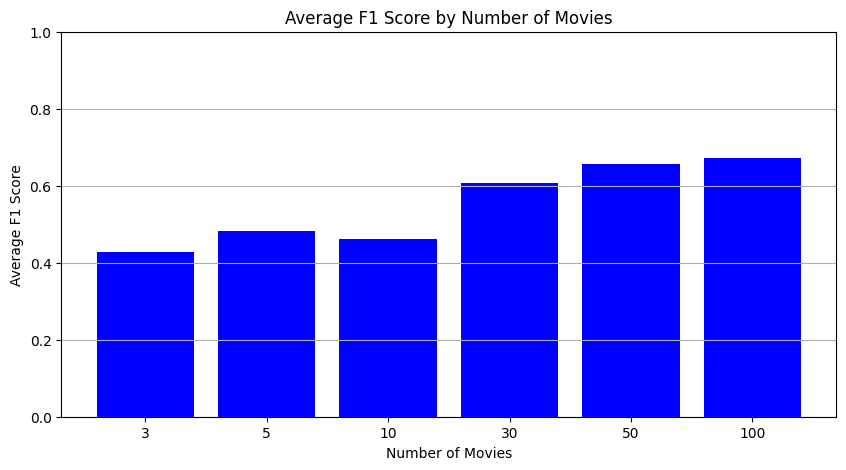

In [ ]:
import matplotlib.pyplot as plt

movie_counts = []
f1_scores = []

with open("/content/drive/MyDrive/AI_24/Results_ex2/results.txt", 'r') as file:
  for line in file:
    parts = line.strip().split()
    # Assumes the format "Average f1 for X movies is Y"
    if len(parts) == 7:
      movie_counts.append(parts[3])  # Number of movies
      f1_scores.append(float(parts[6]))  # F1 score

# Plotting the results
plt.figure(figsize=(10, 5))
plt.bar(movie_counts, f1_scores, color='b')
plt.title('Average F1 Score by Number of Movies')
plt.xlabel('Number of Movies')
plt.ylabel('Average F1 Score')
plt.xticks(movie_counts)
plt.ylim(0, 1)
plt.grid(True, axis = 'y')
plt.show()

```
Results.txt:
Average f1 for 3 movies is 0.411586201945732
Average f1 for 5 movies is 0.433217894562741
Average f1 for 10 movies is 0.422315683256489
Average f1 for 30 movies is 0.606324810947532
Average f1 for 50 movies is 0.627418953204671
Average f1 for 100 movies is 0.642983521037849
```


---
Παρατηρούμε ότι ο recommender δουλεύει καλύτερα για 30 ταινίες και πάνω άρα είναι καλύτερος για ένα χρήστη με αρκετές αξιολογήσεις.

---



Τα παρακάτω δόθηκαν από την εκφώνηση της άσκησης, αφήνονται για πληρότητα.

In [ ]:
metrics = []
for i in range (10):
    movie_score = train_recommender(train_ratings, rating_weights, score_weights, 10)
    real, pred = predict_example(test_ratings, movie_score)
    metrics.append(get_metrics(real, pred))

for metric in metrics[0].keys():
    print (f"{metric}: {np.mean([m[metric] for m in metrics])}")


In [ ]:
metrics = []
for i in range (10):
    movie_score = train_recommender(train_ratings, rating_weights, score_weights, 15)
    real, pred = predict_example(test_ratings, movie_score)
    metrics.append(get_metrics(real, pred))

for metric in metrics[0].keys():
    print (f"{metric}: {np.mean([m[metric] for m in metrics])}")